In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [2]:
# load data
df = pd.read_parquet("https://github.com/monatagelsir7/enivornmental_impact_of_aviation/raw/refs/heads/main/cleaned_aviation_data_v3.parquet")

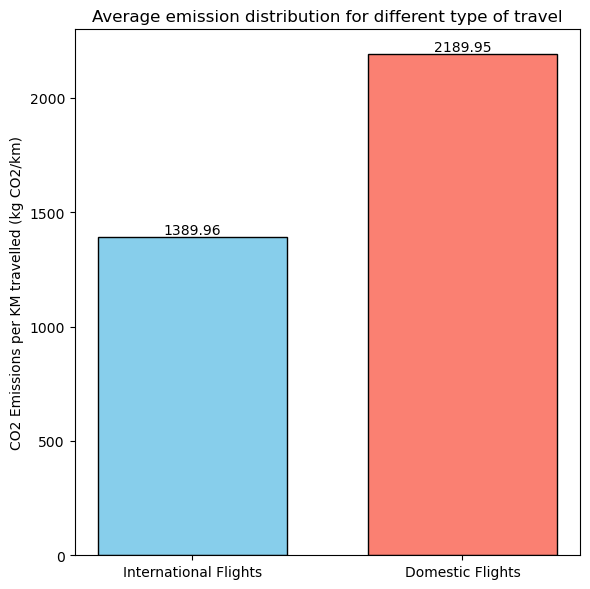

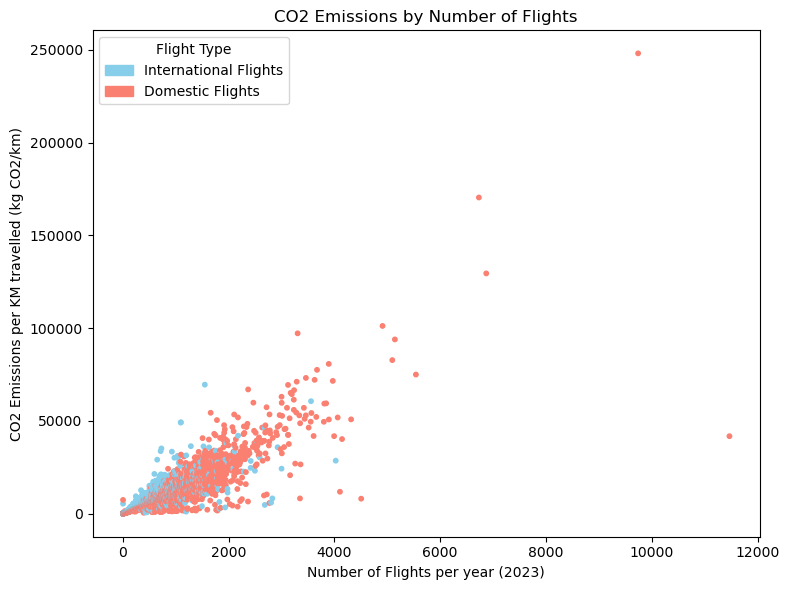

In [3]:
# Domestic vs International Split

dom_vs_intl=df.groupby('domestic')['co2_per_distance'].mean()
labels = {1: "Domestic Flights", 0: "International Flights"}
colors = {0: "skyblue", 1: "salmon"}
x_pos = list(labels.keys())
heights = [dom_vs_intl[i] for i in x_pos]
bar_labels = [labels[i] for i in x_pos]
bar_colors = [colors[i] for i in x_pos]

plt.figure(figsize=(6, 6))
plt.bar(x_pos, heights, color=bar_colors, width=0.7, edgecolor='black')
for i, h in zip(x_pos, heights):
    plt.text(i, h + 0.01, f"{h:.2f}", ha='center', va='bottom', fontsize=10)
plt.xticks(ticks=x_pos, labels=bar_labels)
plt.ylabel("CO2 Emissions per KM travelled (kg CO2/km)")
plt.title("Average emission distribution for different type of travel")
plt.tight_layout()
plt.show()



# Emissions by frequency of flights
freq_flight = df.groupby(["n_flights", "domestic"])["co2_per_distance"].mean()
freq_flight = freq_flight.reset_index()
point_colors = freq_flight["domestic"].map(colors)


legend_handles = [Patch(color=colors[k], label=labels[k]) for k in colors]
plt.figure(figsize=(8, 6))
plt.scatter(freq_flight["n_flights"],freq_flight["co2_per_distance"],c=point_colors,s=10)
plt.xlabel("Number of Flights per year (2023)")
plt.ylabel("CO2 Emissions per KM travelled (kg CO2/km)")
plt.title("CO2 Emissions by Number of Flights")
plt.legend(handles=legend_handles, title="Flight Type")

plt.tight_layout()
plt.show()